In [98]:
! pip install fastai
! pip install surprise
!pip install scikit-learn==1.0.1

In [99]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
from surprise import SVD

In [100]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [101]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [102]:
downloaded = drive.CreateFile({'id':"1C7yioHe3RDgbfZp3U8qTfZGeNR5_DJo4"})
downloaded.GetContentFile('category-lower-all-everything.txt')

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

### Loading of data

In [103]:
df_lower = pd.read_csv('category-lower-all-everything.txt', sep=":")
df_lower.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,total
0,img/Mineral_Wash_Mini_Skirt/img_00000001.jpg,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3
1,img/Mineral_Wash_Mini_Skirt/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Mineral_Wash_Mini_Skirt/img_00000003.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,img/Mineral_Wash_Mini_Skirt/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,img/Mineral_Wash_Mini_Skirt/img_00000005.jpg,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2


In [104]:
downloadedUpper = drive.CreateFile({'id':"1K5VK5yDoVqFRIbaY5KKaRApkK4up3h27"})
downloadedUpper.GetContentFile('category-upper-all-everything.txt')

In [105]:
df_upper = pd.read_csv('category-upper-all-everything.txt', sep=":")
df_upper.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,total
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cleaning upper

In [106]:
del df_upper['total']
df_upper = df_upper.iloc[: , 1:]
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
df_upper.to_csv("df_upper.csv")

In [108]:
## Feature Scaling
StandardScaler = StandardScaler()
df_upper_standardscalar = StandardScaler.fit_transform(df_upper)
df_upper_standardscalar

array([[-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ...,  6.016329, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       ...,
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165]])

In [109]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(df_upper_standardscalar)
labels = kmeans.labels_
kmeans

KMeans(n_clusters=12, random_state=42)

In [110]:
df_upper['label_kmeans'] = labels
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
import pickle
filename = 'df_upper_kmeans.pkl'
pickle.dump(kmeans, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=12, random_state=42)

In [112]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [113]:
## predicting the clusters for the top labels
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter

pred=[1, 1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	1,	1,	1,	0]
pred=np.asarray(pred)
loaded_model_test=loaded_model.fit(pred.reshape(-1, 1))
closest, _ = pairwise_distances_argmin_min(loaded_model.cluster_centers_, pred.reshape(-1, 1))
closest
b = Counter(closest)
b.most_common(1)[0][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  import sys


2

In [114]:
centers = kmeans.cluster_centers_

In [115]:
reduced_data = PCA(n_components=2).fit_transform(df_upper_standardscalar)
principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.188190,-0.330860
1,-0.188190,-0.330860
2,-0.637300,0.530503
3,-0.188190,-0.330860
4,-0.188190,-0.330860
...,...,...
139704,-0.395298,2.238318
139705,-0.188190,-0.330860
139706,-0.188190,-0.330860
139707,-0.188190,-0.330860


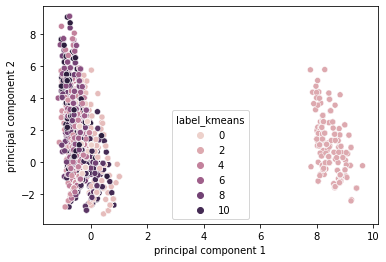

In [116]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_upper['label_kmeans'], data=principalDf)

### Lower

In [117]:
del df_lower['total']
df_lower = df_lower.iloc[: , 1:]
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
df_lower.to_csv("df_lower.csv")

In [119]:
## Feature Scaling
df_lower_standardscalar = StandardScaler.fit_transform(df_lower)
df_lower_standardscalar

array([[-0.275515, -0.246248, -0.143643,  2.402641, ...,  6.291278, -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643, -0.416209, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643,  2.402641, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643, -0.416209, ..., -0.15895 ,  4.335076, -0.186309, -0.172196],
       ...,
       [-0.275515, -0.246248, -0.143643,  2.402641, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643,  2.402641, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643, -0.416209, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643,  2.402641, ..., -0.15895 , -0.230676, -0.186309, -0.172196]])

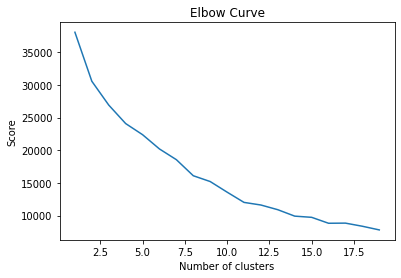

In [120]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_lower)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [121]:
kmeans_lower = KMeans(n_clusters=12, random_state=42).fit(df_lower_standardscalar)
labels_lower = kmeans.labels_

In [122]:
df_lower['label_kmeans'] = labels_lower
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,label_kmeans
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,11
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [123]:
import pickle
filename = 'df_lower_kmeans.pkl'
pickle.dump(kmeans_lower, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=12, random_state=42)

In [124]:
centers_lower = kmeans_lower.cluster_centers_

In [125]:
reduced_data_lower = PCA(n_components=2).fit_transform(df_lower_standardscalar)
principalDf_lower = pd.DataFrame(data = reduced_data_lower
             , columns = ['principal component 1', 'principal component 2'])
principalDf_lower

,principal component 1,principal component 2
0,1.983032,1.694798
1,-0.283587,-0.228208
2,-1.520332,-0.191342
3,0.848071,-0.084577
4,-0.388674,-0.047712
...,...,...
58958,-1.520332,-0.191342
58959,-1.520332,-0.191342
58960,-1.520332,-0.191342
58961,-0.283587,-0.228208


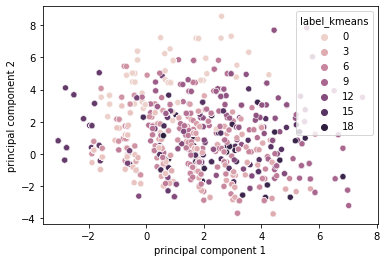

In [126]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_lower['label_kmeans'], data=principalDf_lower)

### Top bottom rating table

In [127]:
downloadedRating = drive.CreateFile({'id':"10zqzA3-v8VfU37v7jxcaE4wbj-L0oRKg"})
downloadedRating.GetContentFile('rating.csv')

In [128]:
df_top_bottom_rating = pd.read_csv('rating.csv')
df_top_bottom_rating.head()

,Unnamed: 0,top,bottom,itemRating
0,0,8188,52013,4.0
1,1,9532,39863,5.0
2,2,2541,55868,1.0
3,3,25719,52417,4.0
4,4,25701,13091,5.0


In [129]:
for i, j in df_top_bottom_rating["top"].iteritems():
    df_top_bottom_rating["topClusterRating"]=df_upper["label_kmeans"]

In [130]:
for i, j in df_top_bottom_rating["bottom"].iteritems():
    df_top_bottom_rating["bottomClusterRating"]=df_lower["label_kmeans"]

## Cluster mapping

In [131]:
df_top_bottom_rating

,Unnamed: 0,top,bottom,itemRating,topClusterRating,bottomClusterRating
0,0,8188,52013,4.0,0,11
1,1,9532,39863,5.0,0,2
2,2,2541,55868,1.0,11,1
3,3,25719,52417,4.0,0,4
4,4,25701,13091,5.0,0,1
...,...,...,...,...,...,...
70,70,60532,5934,1.0,11,10
71,71,138258,55322,5.0,0,18
72,72,5850,53159,3.0,6,1
73,73,90409,58203,3.0,0,11


In [132]:
cluster_mapping=df_top_bottom_rating[["topClusterRating", "bottomClusterRating", "itemRating"]]
cluster_mapping

,topClusterRating,bottomClusterRating,itemRating
0,0,11,4.0
1,0,2,5.0
2,11,1,1.0
3,0,4,4.0
4,0,1,5.0
...,...,...,...
70,11,10,1.0
71,0,18,5.0
72,6,1,3.0
73,0,11,3.0


In [133]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average.to_csv("cluster_mapping_average.csv")

## Collaborative Filtering

In [134]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterRating,bottomClusterRating,itemRating
0,0,0,3.000000
1,0,1,3.466667
2,0,2,3.466667
3,0,4,4.000000
4,0,5,2.000000
5,0,8,5.000000
6,0,11,4.000000
7,0,12,2.000000
8,0,14,4.000000
9,0,18,2.500000


In [135]:
df_ratings = cluster_mapping_average.pivot(index='topClusterRating', columns='bottomClusterRating', values='itemRating')
df_ratings

bottomClusterRating,0,1,2,4,5,7,8,10,11,12,14,18
topClusterRating,,,,,,,,,,,,
0,3.0,3.466667,3.466667,4.0,2.0,NaN,5.0,NaN,4.0,2.0,4.0,2.5
3,NaN,2.000000,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
6,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
7,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,1.000000,2.500000,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,2.5


In [136]:
df_ratings_clean = df_ratings.fillna(0)
df_ratings_clean.head()
df_ratings_clean.to_csv("df_ratings_clean.csv", index=False)

In [137]:
y_range = [0,5.5]

In [138]:
from fastai.collab import *
from fastai.tabular import *
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(cluster_mapping_average, cluster_mapping_average, test_size=0.33, random_state=42)

In [140]:
databunch = CollabDataBunch.from_df(X_train, test = y_test, valid_pct = 0.1, bs=128)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.7/dist-packages/fastai/basic_data.py:248: UserWarning: Your training dataloader is empty, you have only 15 items in your training set.
                 Your batch size is 128, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


In [141]:
learn = collab_learner(databunch, n_factors=50, y_range=(0, 5))
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(7, 50)
  (i_weight): Embedding(9, 50)
  (u_bias): Embedding(7, 1)
  (i_bias): Embedding(9, 1)
)

In [142]:
from sklearn.metrics import *

y_pred = learn.get_preds(ds_type = DatasetType.Test)[0].numpy()
print(mean_absolute_error(X_test["itemRating"], y_pred))

0.9463180665616636


In [143]:
import joblib
filename = 'cf.pkl'
learn.save(filename)


In [144]:
loaded_model = learn.load(filename)
loaded_model.model

EmbeddingDotBias(
  (u_weight): Embedding(7, 50)
  (i_weight): Embedding(9, 50)
  (u_bias): Embedding(7, 1)
  (i_bias): Embedding(9, 1)
)

In [145]:
IncommingclusterValue=0
y_pred = loaded_model.get_preds(ds_type = DatasetType.Test)[clusterValue].numpy()
y_pred

array([2.494729, 2.499554, 2.494729, 2.510927, 2.499928, 2.477845, 2.506984, 2.473808, 2.508699], dtype=float32)